In [1]:
# plot_venn.ipynb
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
# Author: Keila Velazquez-Arcelay
#
# Description: Plot Venn diagram showing the intersection of DR circadian genes between arcaics
# 
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

'\n# Author: Keila Velazquez-Arcelay\n# Input:\n# Output:\n#\n# Description: Extract circadian genes from list of PrediXcan divergently regulated genes\n'

In [1]:
DR_GENES = '../results/predixcan_dr_circadian.tab'
DR_GENES_ALTAI = '../results/predixcan_dr_circadian_altai.tab'
DR_GENES_VINDIJA = '../results/predixcan_dr_circadian_vindija.tab'
DR_GENES_DENISOVA = '../results/predixcan_dr_circadian_denisova.tab'

In [2]:
import pandas as pd
from functools import reduce
from matplotlib_venn import venn3,venn3_circles
from matplotlib import pyplot as plt
import venn

In [3]:
# FILES
dr_genes = pd.read_csv(DR_GENES, sep='\t')
#dr_genes_union = pd.read_csv(DR_GENES_UNION, sep='\t')
altai_dr = pd.read_csv(DR_GENES_ALTAI, sep='\t')#[['GeneID','GeneName']].drop_duplicates()
vindija_dr = pd.read_csv(DR_GENES_VINDIJA, sep='\t')#[['GeneID','GeneName']].drop_duplicates()
denisova_dr = pd.read_csv(DR_GENES_DENISOVA, sep='\t')#[['GeneID','GeneName']].drop_duplicates()

In [4]:
altai_dr['Altai'] = 1
vindija_dr['Vindija'] = 1
denisova_dr['Denisova'] = 1

In [5]:
# Merge all three archaic dfs
dfs = [altai_dr, vindija_dr, denisova_dr]
df = reduce(lambda left,right: pd.merge(left,right,on=['GeneID','GeneName','GTEx_Tissue'],
                                   how='outer'), dfs)#[['GeneID','GeneName','Altai','Vindija','Denisova']].drop_duplicates()



In [6]:
# Create columm for presence of Gene/Tissue sums
#df['SUM'] = df.sum(axis=1)
maybe = df.groupby(['GeneID','GeneName']).max('SUM').reset_index()


In [7]:
plus_one = pd.merge(df,maybe,on=['GeneID','GeneName','Altai','Vindija','Denisova'])
plus_one['Gene/Tissue'] = plus_one['GeneID'] + '/' + plus_one['GTEx_Tissue']
       
         

In [8]:
plus_one = plus_one.groupby(['GeneID','GeneName']).max()

In [9]:
plus_one

,,GTEx_Tissue,Altai,Vindija,Denisova,Gene/Tissue
GeneID,GeneName,,,,,
ENSG00000069667,RORA,Esophagus_Gastroesophageal_Junction,1.0,1.0,1.0,ENSG00000069667/Esophagus_Gastroesophageal_Jun...
ENSG00000081913,PHLPP1,Brain_Anterior_cingulate_cortex_BA24,1.0,1.0,1.0,ENSG00000081913/Brain_Anterior_cingulate_corte...
ENSG00000107104,KANK1,Whole_Blood,1.0,1.0,1.0,ENSG00000107104/Whole_Blood
ENSG00000107485,GATA3,Skin_Sun_Exposed_Lower_leg,NaN,1.0,NaN,ENSG00000107485/Skin_Sun_Exposed_Lower_leg
ENSG00000108784,NAGLU,Liver,1.0,1.0,1.0,ENSG00000108784/Liver
ENSG00000111602,TIMELESS,Skin_Sun_Exposed_Lower_leg,1.0,1.0,1.0,ENSG00000111602/Skin_Sun_Exposed_Lower_leg
ENSG00000115738,ID2,Skin_Not_Sun_Exposed_Suprapubic,1.0,NaN,NaN,ENSG00000115738/Skin_Not_Sun_Exposed_Suprapubic
ENSG00000117318,ID3,Brain_Hippocampus,1.0,1.0,1.0,ENSG00000117318/Brain_Hippocampus
ENSG00000129673,AANAT,Artery_Coronary,1.0,1.0,1.0,ENSG00000129673/Artery_Coronary


In [9]:
#
altai_dr = plus_one[plus_one['Altai'] == 1][['Gene/Tissue']]
denisova_dr = plus_one[plus_one['Denisova'] == 1][['Gene/Tissue']]
vindija_dr = plus_one[plus_one['Vindija'] == 1][['Gene/Tissue']]

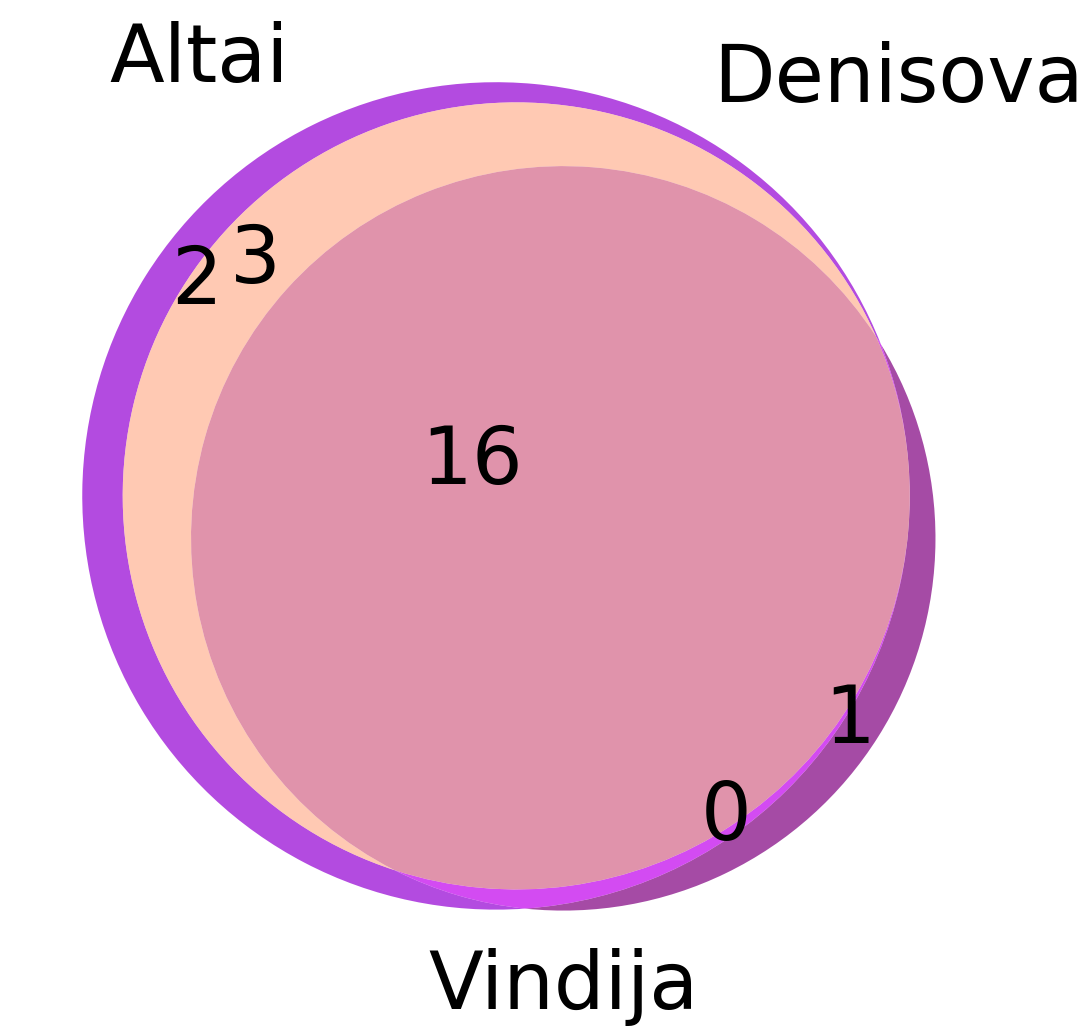

In [41]:
plt.figure(figsize=(18,18))

set1 = set(altai_dr['Gene/Tissue'])
set2 = set(denisova_dr['Gene/Tissue'])
set3 = set(vindija_dr['Gene/Tissue'])

ax = plt.gca()
c = venn3([set1, set2, set3], ('Altai', 'Denisova', 'Vindija'), ax=ax,
          set_colors=('darkviolet','yellow','purple'), alpha=0.7) # deepskyblue

for text in c.set_labels:
    text.set_fontsize(80)
for x in range(len(c.subset_labels)):
    if c.subset_labels[x] is not None:
        c.subset_labels[x].set_fontsize(80)

#plt.savefig('plots/predixcan_dr_venn.pdf', dpi=300, bbox_inches='tight')
plt.show()

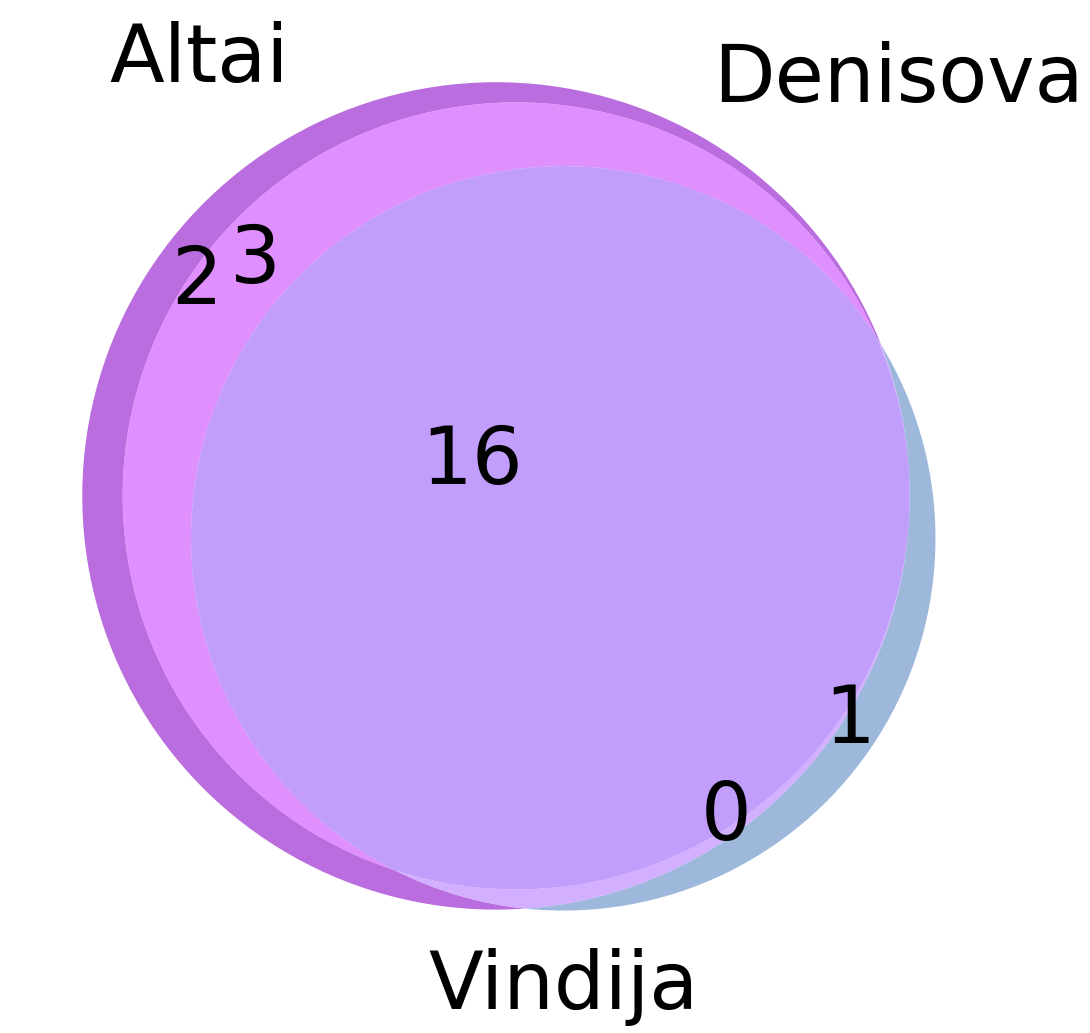

In [19]:
plt.figure(figsize=(18,18))

set1 = set(altai_dr['Gene/Tissue'])
set2 = set(denisova_dr['Gene/Tissue'])
set3 = set(vindija_dr['Gene/Tissue'])

ax = plt.gca()
c = venn3([set1, set2, set3], ('Altai', 'Denisova', 'Vindija'), ax=ax,
          set_colors=('#9e30d0','#8f59d4','#769bce'), alpha=0.7) # deepskyblue

for text in c.set_labels:
    text.set_fontsize(80)
for x in range(len(c.subset_labels)):
    if c.subset_labels[x] is not None:
        c.subset_labels[x].set_fontsize(80)

plt.savefig('plots/predixcan_dr_venn.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [152]:
df[df.sum(axis=1)<3]

,GeneID,GeneName,GTEx_Tissue,Altai,Vindija,Denisova
2,ENSG00000143772,ITPKB,Esophagus_Mucosa,1.0,NaN,NaN
3,ENSG00000115738,ID2,Skin_Not_Sun_Exposed_Suprapubic,1.0,NaN,NaN
8,ENSG00000174080,CTSF,Adipose_Visceral_Omentum,1.0,1.0,NaN
9,ENSG00000174080,CTSF,Brain_Cerebellar_Hemisphere,1.0,1.0,NaN
14,ENSG00000140538,NTRK3,Adipose_Visceral_Omentum,1.0,1.0,NaN
15,ENSG00000140836,ZFHX3,Cells_Cultured_fibroblasts,1.0,1.0,NaN
16,ENSG00000132382,MYBBP1A,Muscle_Skeletal,1.0,1.0,NaN
18,ENSG00000141510,TP53,Brain_Nucleus_accumbens_basal_ganglia,1.0,1.0,NaN
19,ENSG00000126368,NR1D1,Esophagus_Mucosa,1.0,1.0,NaN
26,ENSG00000140836,ZFHX3,Small_Intestine_Terminal_Ileum,NaN,1.0,1.0


In [100]:
CTSF
NR1D1
ZFHX3

In [ ]:

# -------------------------------------------------------------------------------------


In [78]:
from matplotlib_venn import venn2#, venn2_circles, venn2_unweighted
from matplotlib import pyplot as plt
import venn

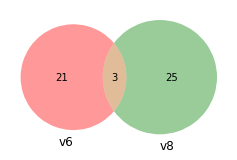

In [80]:

plt.figure(figsize=(4,4))
set1 = set(v6['GeneID'])
set2 = set(v8['GeneID'])

venn2([set1, set2], ('v6', 'v8'))
plt.show()